# Pymaceuticals Inc.
---

### Analysis

- Rapomain and Capomulin are the 2 best medications, and it is shown that Capomulin decreases the size of the tumor decreases over time.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined = mouse_metadata.merge(study_results)
# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(combined["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined[["Mouse ID", "Timepoint"]]
checker = combined[combined.duplicated(["Mouse ID", "Timepoint"], keep= False)]
checker["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined[combined["Mouse ID"] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_list = []
for things in g989.index:
    index_list.append(things)
combined = combined.drop(index = index_list)
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_amount_of_mice = len(combined["Mouse ID"].unique())
new_amount_of_mice

248

## Summary Statistics

In [7]:
Var = combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
Var

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std = combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

stats = pd.concat([mean.rename("Mean Tumor Value"),median.rename( "Median Tumot Value"),var.rename("Tumor Value Variance"),std.rename("Tumor Value Std. Dev."),sem.rename("Tumor Volume Std. Err.")], axis= 1)
stats

,Mean Tumor Value,Median Tumot Value,Tumor Value Variance,Tumor Value Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

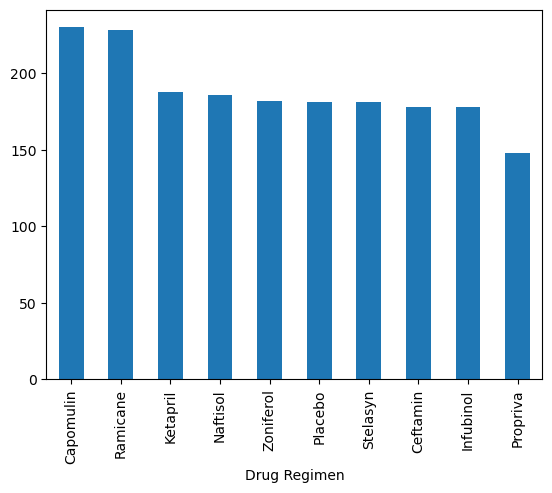

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar = combined.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending= False)
bar.plot(kind= "bar")

Text(0, 0.5, '# of Rows')

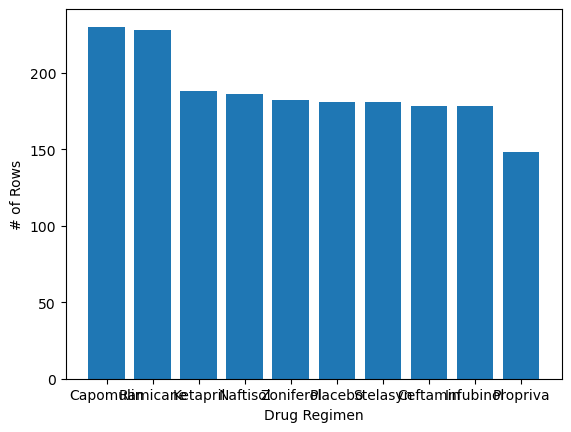

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots()
ax.bar(bar.index, bar)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Rows")

<Axes: ylabel='Sex'>

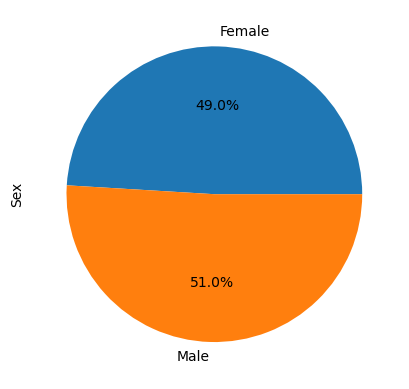

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie = combined.groupby(["Sex"])["Timepoint"].count()
pie.plot(kind = "pie", label = "Sex", autopct = "%.1f%%")


Text(0.5, 1.0, 'Sex')

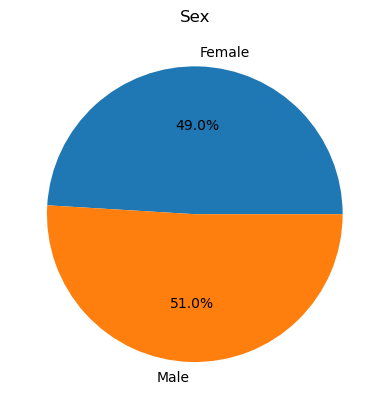

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fix, ax2 = plt.subplots()
ax2.pie(pie, labels = pie.index, autopct= "%.1f%%")
ax2.set_title("Sex")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse = combined.groupby("Mouse ID")["Timepoint"].max()
final = pd.merge(combined, mouse, on= ["Mouse ID", "Timepoint"])
final
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatements = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatements: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final[final["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print results
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x2838a617c90>,
 'caps': [<matplotlib.lines.Line2D at 0x2838a613650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2838a604850>,
 'medians': [<matplotlib.lines.Line2D at 0x2838a613550>,
 'fliers': [<matplotlib.lines.Line2D at 0x2838a612250>,
 'means': []}

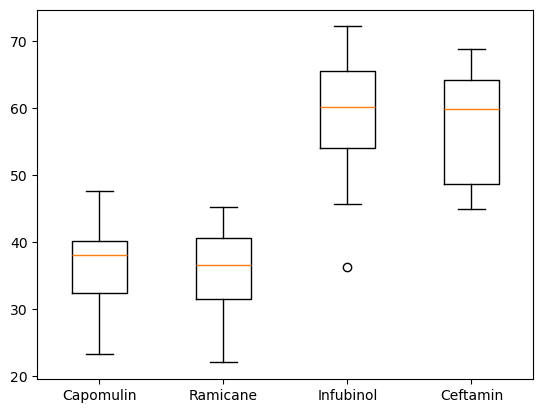

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax6 = plt.subplots()
ax6.boxplot(tumor_volume_data, labels = treatements)

## Line and Scatter Plots

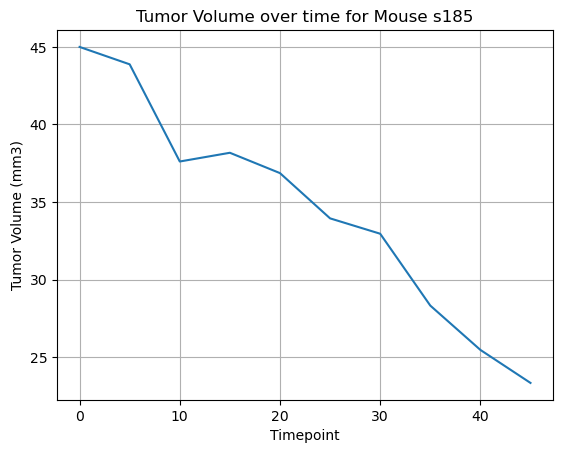

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse1509 = combined[combined["Mouse ID"] == "s185"]

fig, ax3 = plt.subplots()
ax3.plot(mouse1509["Timepoint"], mouse1509["Tumor Volume (mm3)"])
ax3.set_title("Tumor Volume over time for Mouse s185")
ax3.set_xlabel("Timepoint")
ax3.set_ylabel("Tumor Volume (mm3)")
ax3.grid()

The correlation coeffient between Mouse Weight and Average Tumor Volume is 0.84


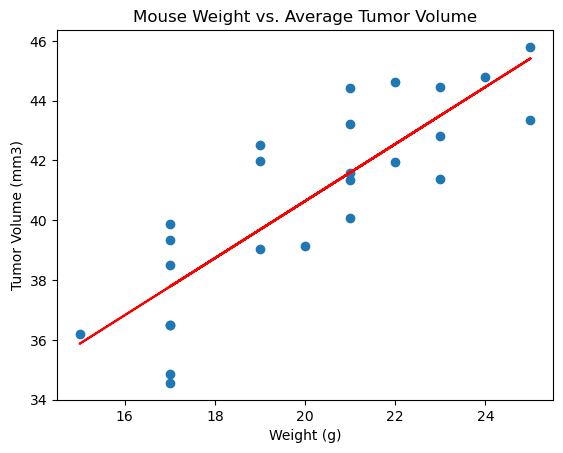

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig, ax4 = plt.subplots()
capo = combined[combined["Drug Regimen"] == "Capomulin"]
capomulin = capo.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
ax4.scatter(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
ax4.set_title("Mouse Weight vs. Average Tumor Volume")
ax4.set_xlabel("Weight (g)")
ax4.set_ylabel("Tumor Volume (mm3)")


slope, intercept, r, p, se = st.linregress(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
print(f"The correlation coeffient between Mouse Weight and Average Tumor Volume is {round(r, 2)}")
lin_regression_volume = [slope * x + intercept for x in capomulin["Weight (g)"]]
ax4.plot(capomulin["Weight (g)"], lin_regression_volume, color= "r")

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#slope, intercept, r, p, se = st.linregress(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
#print(f"The correlation coeffient between Mouse Weight and Average Tumor Volume is {round(r, 2)}")
#lin_regression_volume = [slope * x + intercept for x in capomulin["Weight (g)"]]
#ax4.plot(capomulin["Weight (g)"], lin_regression_volume)

#I copied this code to the code above

The correlation coeffient between Mouse Weight and Average Tumor Volume is 0.84
